Predicted League Standings:
             Team  Score
2       Barcelona   55.0
0       Liverpool   46.0
6         Arsenal   40.0
8     Aston Villa   36.0
26      Stuttgart   15.0
18       Juventus   12.0
5      Leverkusen    0.0
7       AS Monaco    0.0
34         Slovan    0.0
33        Leipzig    0.0
32        Bologna    0.0
31    RB Salzburg    0.0
30  Crvena zvezda    0.0
29         Girona    0.0
28          Sturm    0.0
27   Sparta Praha    0.0
3        Dortmund    0.0
25       Shakhtar    0.0
24            PSG    0.0
23    Real Madrid    0.0
22         Dinamo    0.0
21    Club Brugge    0.0
20      Feyenoord    0.0
19         Celtic    0.0
1           Inter    0.0
17            PSV    0.0
16       Man City    0.0
15          Milan    0.0
14    Atl. Madrid    0.0
13        Benfica    0.0
12         Bayern    0.0
11          Lille    0.0
10          Brest    0.0
9        Sporting    0.0
4        Atalanta    0.0
35     Young Boys    0.0


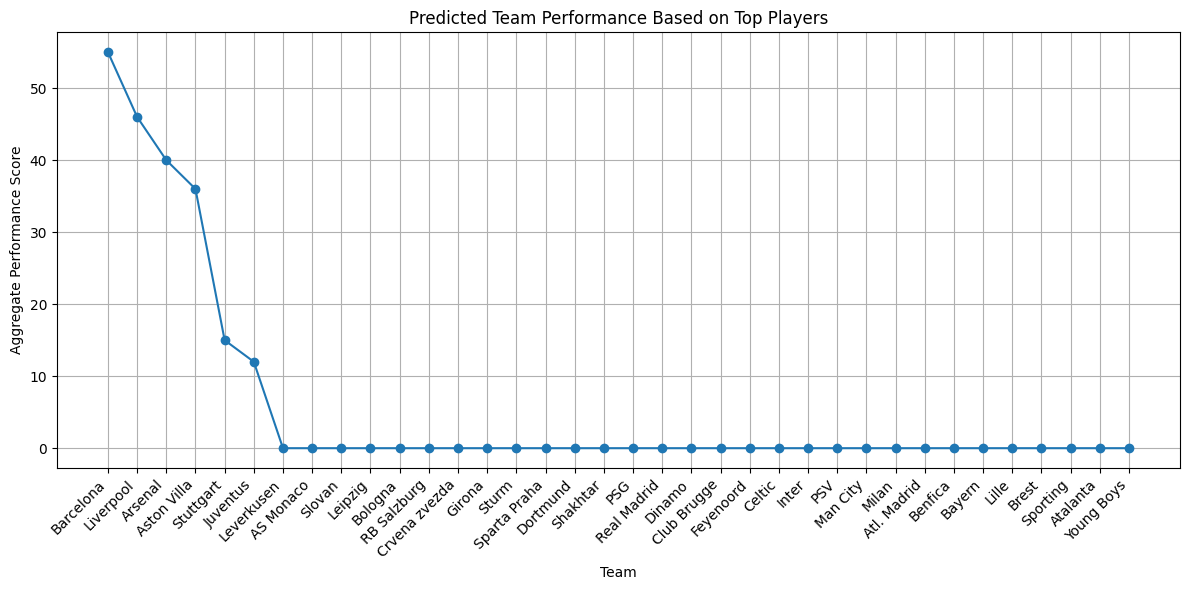

In [ ]:
# Winning Team

import pandas as pd
import matplotlib.pyplot as plt

league_standings_file_path = 'UCL_League_Standings.csv'
league_standings = pd.read_csv(league_standings_file_path, encoding='latin1')

# Loading the datasets 
goalkeepers_file_path = 'UCL_Goalkeepers.csv'
defenders_file_path = 'UCL_Defenders.csv'
midfielders_file_path = 'UCL_Midfielders.csv'
attackers_file_path = 'UCL_ATTACKERS.csv'

# Goalkeepers
goalkeepers = pd.read_csv(goalkeepers_file_path, encoding='latin1')
goalkeepers['Performance Metric'] = (
    goalkeepers['Saves'] +
    goalkeepers['Clean Sheets'] * 10 +
    goalkeepers['Penalties Saved'] * 5 +
    goalkeepers['Average Sofascore']
)
goalkeepers_top10 = goalkeepers.nlargest(10, 'Performance Metric')

# Defenders
defenders = pd.read_csv(defenders_file_path, encoding='latin1')
defenders['Performance Metric'] = (
    defenders['Tackles'] * 2 +
    defenders['Interceptions'] * 3 +
    defenders['Clean sheet'] * 5 -
    defenders['Errors lead to goal'] * 2 -
    defenders['Dribbled past'] +
    defenders['Clearances'] * 1.5
)
defenders_top10 = defenders.nlargest(10, 'Performance Metric')

# Midfielders
midfielders = pd.read_csv(midfielders_file_path, encoding='latin1')
midfielders['Performance Metric'] = (
    midfielders['Assists'] * 5 +
    midfielders['Key Passes'] * 3 +
    midfielders['Accurate Passes %'] * 2 +
    midfielders['Accurate Long Balls %'] * 1.5 +
    midfielders['Accurate Passes'] * 0.5
)
midfielders_top10 = midfielders.nlargest(10, 'Performance Metric')

# Attackers
attackers = pd.read_csv(attackers_file_path, encoding='latin1')
attackers['Performance Metric'] = (
    attackers['Goals'] * 6 +
    attackers['Assists'] * 4 +
    attackers['Expected Goals (xG)'] * 2 +
    attackers['Shots on Target'] * 1.5 -
    attackers['Big Chances Missed'] * 2 +
    attackers['Goal Conversion %']
)
attackers_top10 = attackers.nlargest(10, 'Performance Metric')

# Dictionary to hold team scores
team_scores = {}
# Function to update team scores
def update_team_scores(df_top10, weight):
    for index, row in df_top10.iterrows():
        team = row['Team']
        score = weight * (10 - index) 
        if team in team_scores:
            team_scores[team] += score
        else:
            team_scores[team] = score

# Updating team scores with weighted positions
update_team_scores(goalkeepers_top10.reset_index(), weight=4)  
update_team_scores(defenders_top10.reset_index(), weight=3)   
update_team_scores(midfielders_top10.reset_index(), weight=2)  
update_team_scores(attackers_top10.reset_index(), weight=3)    

# Converting team_scores to DataFrame
team_scores_df = pd.DataFrame(list(team_scores.items()), columns=['Team', 'Score'])
# Merge with league standings
league_standings = league_standings.merge(team_scores_df, on='Team', how='left')
league_standings['Score'] = league_standings['Score'].fillna(0)

# Predicting standings based on team scores
predicted_standings = league_standings.sort_values(by='Score', ascending=False)
# Print predicted standings
print("Predicted League Standings:")
print(predicted_standings[['Team', 'Score']])

# Show results with a line graph
plt.figure(figsize=(12, 6))
plt.plot(predicted_standings['Team'], predicted_standings['Score'], marker='o')
plt.title('Predicted Team Performance Based on Top Players')
plt.xlabel('Team')
plt.ylabel('Aggregate Performance Score')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()